# Homework - Week 2

In [0]:
from sklearn.impute import SimpleImputer
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [0]:
plt.rcParams["figure.figsize"] = (18, 8)
pd.set_option('max.columns', None)

# EDA + Seaborn

Read the dataset heart_disease.csv using pandas. Path: /dbfs/FileStore/CDS2024/heart_disease.csv

In [0]:
heart = pd.read_csv('/dbfs/FileStore/CDS2024/heart_disease.csv')
heart.head()

Out[3]:

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Are there any missing values in dataset? How many missing values are there in each dataset column?

Use seaborn to plot if there are any missing values and use pandas to count the number of missing values in each column

In [0]:
heart.isnull().sum()

Out[4]: age 0
sex 0
cp 0
trestbps 0
chol 0
fbs 0
restecg 0
thalach 0
exang 0
oldpeak 0
slope 0
ca 0
thal 0
target 0
dtype: int64

### What is the distribution of target variable "target"?

Use seaborn library to show the result and panda functions to show the result in percentage

In [0]:
heart['target'].describe()

Out[5]: count 303.000000
mean 0.544554
std 0.498835
min 0.000000
25% 0.000000
50% 1.000000
75% 1.000000
max 1.000000
Name: target, dtype: float64

### What is the age distribution of the patients in the dataset? 

Plot a histogram of age distribution using seaborn

In [0]:
heart.age.describe()

Out[26]: count 303.000000
mean 54.366337
std 9.082101
min 29.000000
25% 47.500000
50% 55.000000
75% 61.000000
max 77.000000
Name: age, dtype: float64

Out[27]:

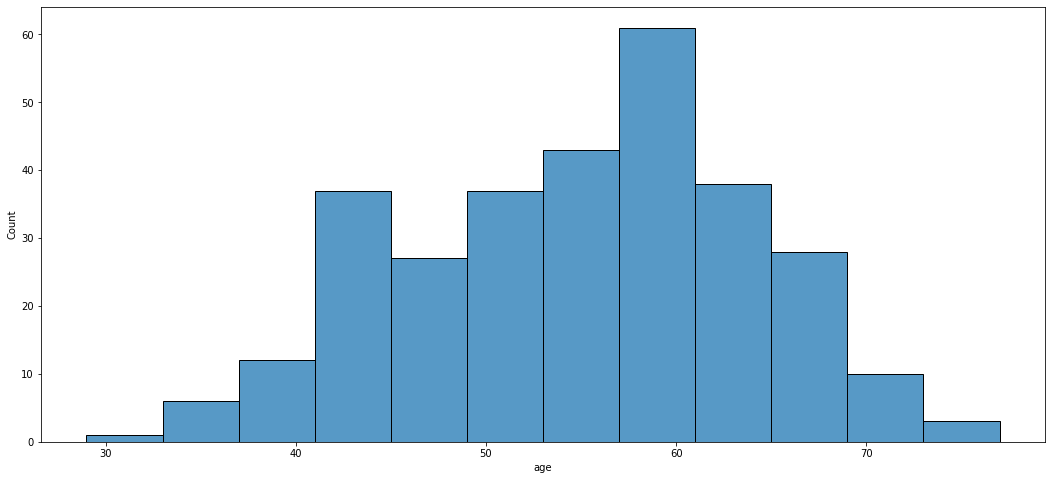

<AxesSubplot:xlabel='age', ylabel='Count'>

In [0]:
sns.histplot(data=heart, x='age')

### What are the basic statistics of the age column by each target variable?
Use pandas to group the target variable and calculate the descriptive statistics

In [0]:
heart.groupby('target')['age'].describe()

Out[12]:

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,138.0,56.601449,7.962082,35.0,52.0,58.0,62.0,77.0
1,165.0,52.496970,9.550651,29.0,44.0,52.0,59.0,76.0


### Is there any correlation between age and thalach columns? 
Create a heatmap of the correlation matrix to show the result

In [0]:
a = heart[['age', 'thalach']].corr()
a

Out[21]:

,age,thalach
age,1.000000,-0.398522
thalach,-0.398522,1.000000


Out[22]:

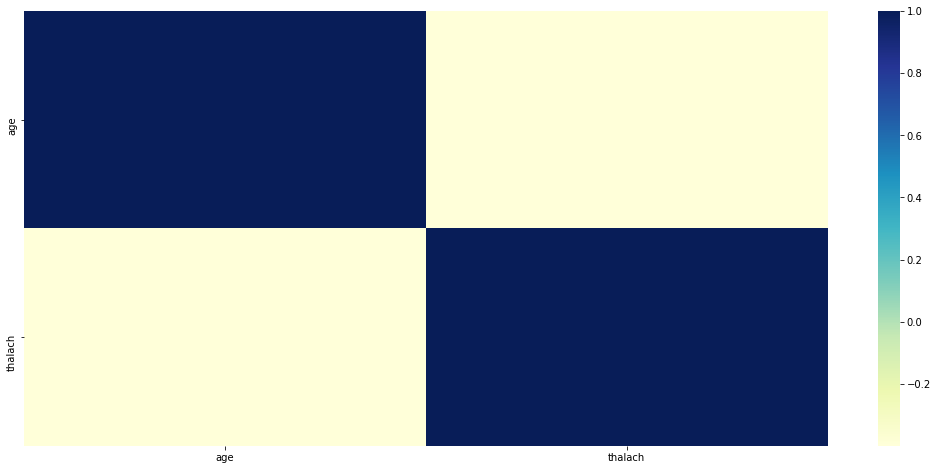

<AxesSubplot:>

In [0]:
sns.heatmap(a, cmap='YlGnBu')

### What is the distribution of thalach column for patients with and without heart disease? 
Use a boxplot to visualize the distribution

In [0]:
heart.head()

Out[24]:

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Out[28]:

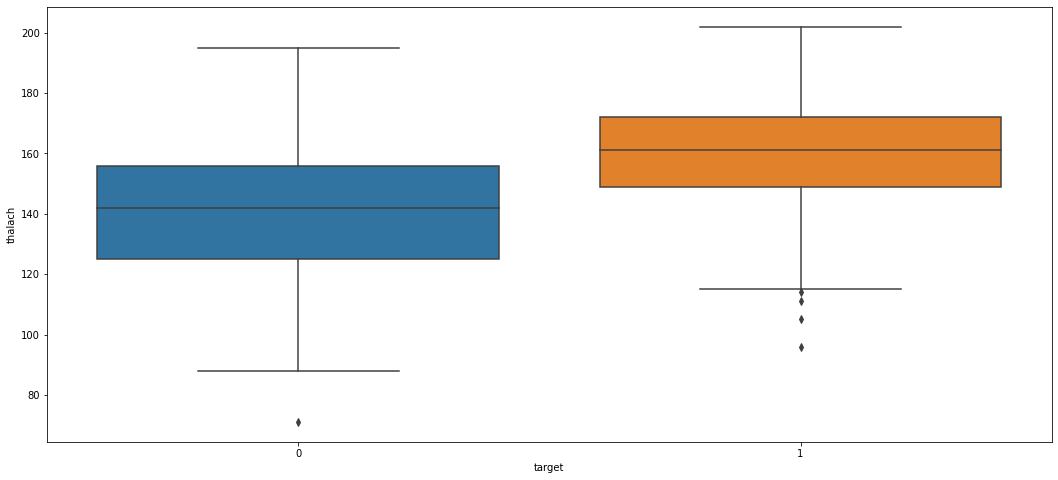

<AxesSubplot:xlabel='target', ylabel='thalach'>

In [0]:
sns.boxplot(x='target', y='thalach', data=heart)

### What is the relationship between age and chol columns?
Use a hexplot to visualize the relationship

Out[32]:

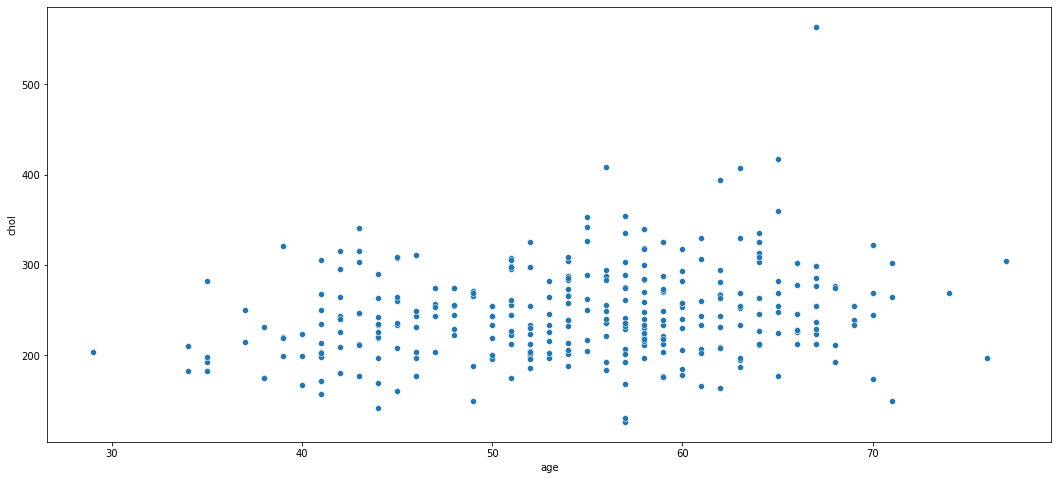

<AxesSubplot:xlabel='age', ylabel='chol'>

In [0]:
sns.scatterplot(x='age', y='chol', data=heart)

### Is there any difference in mean age of patients with different chest pain types? 
Perform an ANOVA test and plot the results using seaborn

In [0]:
from scipy import stats

In [0]:
heart.columns

Out[34]: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
 dtype='object')

In [0]:
heart['cp'].unique()

Out[35]: array([3, 2, 1, 0])

In [0]:
heart.groupby('cp')['age'].mean().round(1)

Out[38]: cp
0 55.7
1 51.4
2 53.5
3 55.9
Name: age, dtype: float64

In [0]:
pearson_coef, p_value=stats.pearsonr(heart['cp'], heart['age'])
print('The Pearson Correlation Coefficient is', pearson_coef, "with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.06865301584014488 with a P-value of P = 0.23345628530697077

In [0]:
grouped = heart.groupby('cp')['age'].mean().to_frame()
grouped

Out[49]:

,age
cp,
0,55.692308
1,51.360000
2,53.517241
3,55.869565


Out[57]:

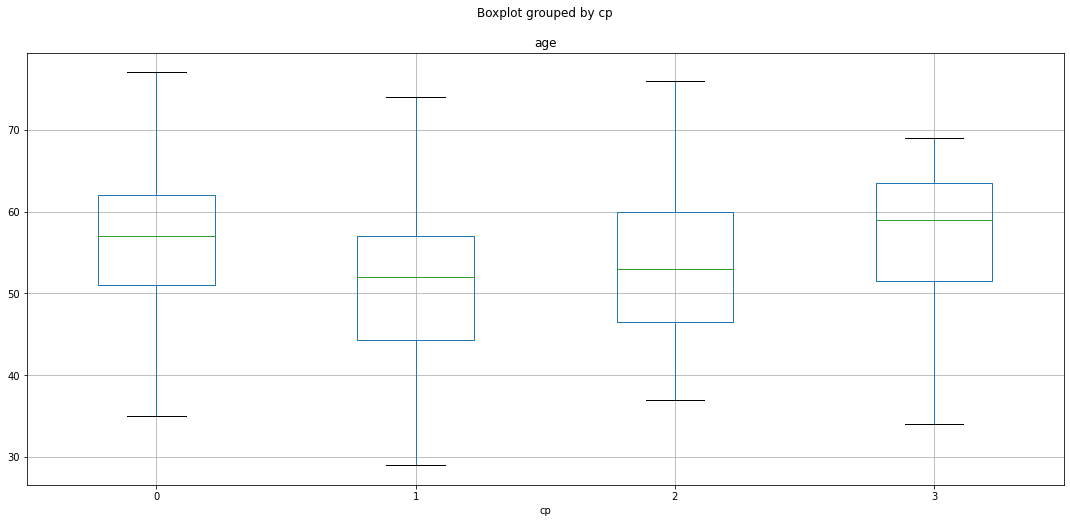

<AxesSubplot:title={'center':'age'}, xlabel='cp'>

In [0]:
df = pd.DataFrame(heart, columns=['cp', 'age'])
df.boxplot(column='age', by='cp', grid=True)

In [0]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = 'cp ~ age*cp'

two_anova = ols(model, data=heart).fit()

anova_lm(two_anova)

Out[60]:

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,1.516107e+00,1.516107e+00,6.195419e+27,0.000000
cp,1.0,3.201539e+02,3.201539e+02,1.308277e+30,0.000000
age:cp,1.0,3.674388e-32,3.674388e-32,1.501502e-04,0.990231
Residual,299.0,7.316953e-26,2.447141e-28,NaN,NaN


Out[62]:

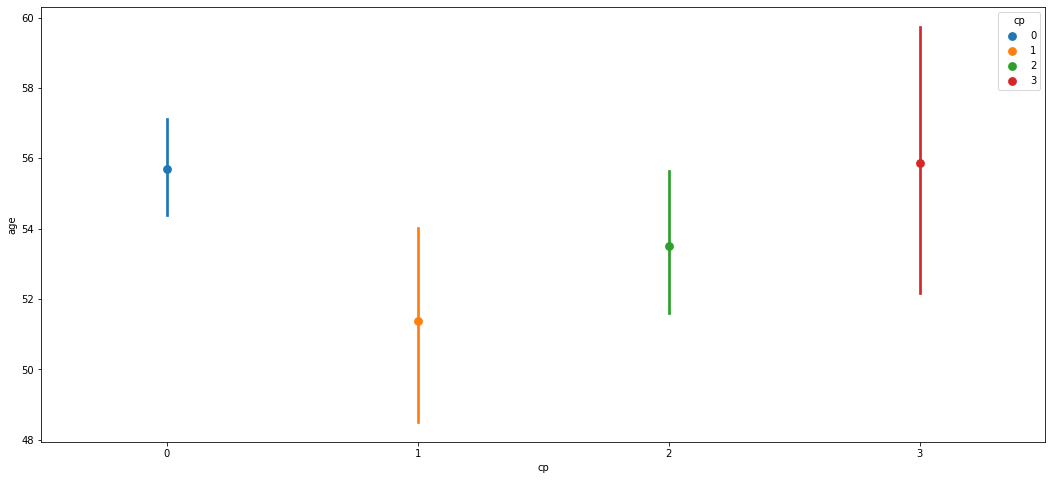

<AxesSubplot:xlabel='cp', ylabel='age'>

In [0]:
import seaborn as sns
sns.pointplot(x='cp', y='age', hue='cp', data=heart)

# Feature engineering

Read the dataset house_price.csv using pandas. Path: /dbfs/FileStore/CDS2024/houseprice.csv

In [0]:
house = pd.read_csv('/dbfs/FileStore/CDS2024/houseprice.csv')

### Explore the dataset using pandas. Are there any missing values? How many missing values are there in each feature? 
Use seaborn library to plot the results. 

In [0]:

house.isnull().sum()

Out[68]: Unnamed: 0 0
Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
 ... 
MoSold 0
YrSold 0
SaleType 0
SaleCondition 0
SalePrice 0
Length: 82, dtype: int64

In [0]:
house.isnull().mean()

Out[69]: Unnamed: 0 0.000000
Id 0.000000
MSSubClass 0.000000
MSZoning 0.000000
LotFrontage 0.177397
 ... 
MoSold 0.000000
YrSold 0.000000
SaleType 0.000000
SaleCondition 0.000000
SalePrice 0.000000
Length: 82, dtype: float64

In [0]:
house.shape

Out[70]: (1460, 82)

In [0]:
# we can calculate the percentage of missing values('NA' = Not Available) for each variable and select those with more than 0%.

vars_with_na = [var for var in house.columns if house[var].isnull().mean() > 0]
vars_with_na

Out[71]: ['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [0]:
house[vars_with_na].dtypes

Out[72]: LotFrontage float64
Alley object
MasVnrType object
MasVnrArea float64
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinType2 object
Electrical object
FireplaceQu object
GarageType object
GarageYrBlt float64
GarageFinish object
GarageQual object
GarageCond object
PoolQC object
Fence object
MiscFeature object
dtype: object

### Implement univariate imputation to handle missing values in the dataset.
For each feature, tell us what imputation strategy you choose. Plot the results.

In [0]:
house_na = house[vars_with_na].isnull().mean()
house_na = pd.DataFrame(house_na.reset_index())
house_na.columns = ['variable', 'na_percentage']
house_na.sort_values(by='na_percentage', ascending=False, inplace=True)
house_na

Out[79]:

,variable,na_percentage
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479
14,GarageQual,0.055479


### Explore the distribution of the target variable SalePrice using seaborn. Is it normally distributed? If not, how can you transform it to make it more normal?

Use seaborn to plot the results

Out[73]:

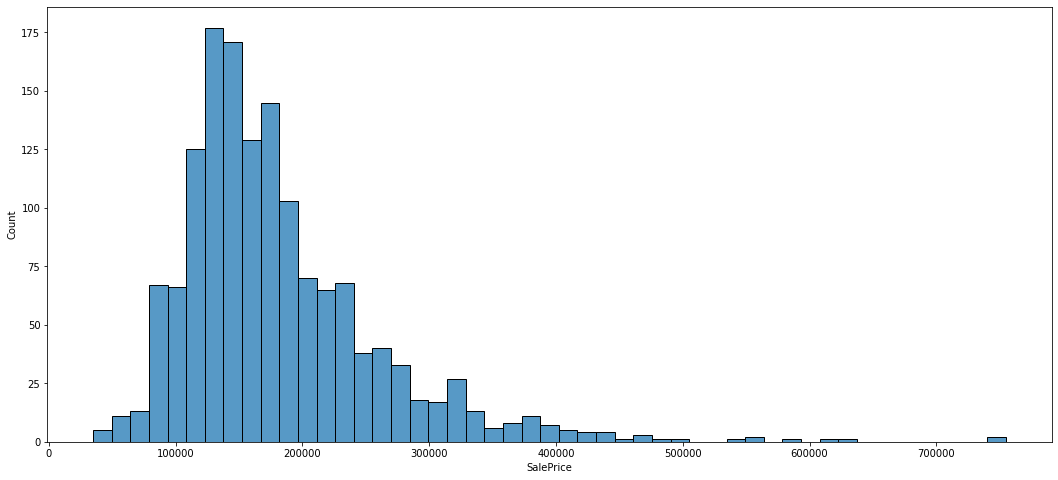

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

In [0]:
sns.histplot(house, x='SalePrice')